Jeff Dunagin

Exercise 8.2

DSC 530

6 February 2022

# 9.1
As sample size increases, the power of a hypothesis test increases, which means it is more likely to be positive if the effect is real. Conversely, as sample size decreases, the test is less likely to be positive even if the effect is real.

To investigate this behavior, run the tests in this chapter with different subsets of the NSFG data. You can use `thinkstats2.SampleRows` to select a random subset of the rows in a DataFrame.

What happens to the p-values of these tests as sample size decreases? What is the smallest sample size that yields a positive test?

In [2]:
# import
import thinkstats2
import first
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# get data
live, firsts, others = first.MakeFrames()

In [4]:
# sample
sample = thinkstats2.SampleRows(live, 10)

In [5]:
# get firsts and others from the sample itself
firsts = sample[sample.birthord == 1]
others = sample[sample.birthord != 1]

In [10]:
# functions that will help with the statistical tests
def PregLengths(sample, iters):
    firsts = sample[sample.birthord == 1]
    others = sample[sample.birthord != 1]
    
    first_prglngths = firsts.prglngth.dropna().values
    others_prglngths = others.prglngth.dropna().values
    
    # get the mean difference
    first_mean = first_prglngths.mean()
    others_mean = others_prglngths.mean()
    mean_diff = first_mean - others_mean
    print('Mean Difference in Preg Length: {} weeks'.format(mean_diff))
    
    # see probablilty of this randomly happening
    count = 0
    for _ in range(iters):
        first_len = len(first_prglngths)
        others_len = len(others_prglngths)
    
        all_prglngths = sample.prglngth.values
        np.random.shuffle(all_prglngths)
    
        new_first = all_prglngths[:first_len]
        new_others = all_prglngths[first_len:]
        new_mean_diff = new_first.mean() - new_others.mean()
        if new_mean_diff / mean_diff >= 1:
            count += 1
    print('P Value: {}'.format(count/iters))

    
def BirthWeights(sample, iters):
    firsts = sample[sample.birthord == 1]
    others = sample[sample.birthord != 1]
    
    first_wgts = firsts.totalwgt_lb.dropna().values
    others_wgts = others.totalwgt_lb.dropna().values
    
    # get the mean difference
    first_mean = first_wgts.mean()
    others_mean = others_wgts.mean()
    mean_diff = first_mean - others_mean
    print('Mean Difference in Birth Weights: {} lbs'.format(mean_diff))
    
    # see probablilty of this randomly happening
    count = 0
    for _ in range(iters):
        first_len = len(first_wgts)
        others_len = len(others_wgts)
    
        all_wgts = sample.totalwgt_lb.values
        np.random.shuffle(all_wgts)
    
        new_first = all_wgts[:first_len]
        new_others = all_wgts[first_len:]
        new_mean_diff = new_first.mean() - new_others.mean()
        if new_mean_diff / mean_diff >= 1:
            count += 1
    print('P Value: {}'.format(count/iters))
    

def Correlate(sample, iters):
    live2 = sample.dropna(subset=['agepreg', 'totalwgt_lb'])
    ages = live2.agepreg.values
    weights = live2.totalwgt_lb.values
    corr = np.corrcoef(ages, weights)
    print('Correlation Coefficient between Age and Weight: {}'.format(corr[0][1]))
    
    count = 0
    for _ in range(iters):    
        np.random.shuffle(ages)
        np.random.shuffle(weights)
        new_corr = np.corrcoef(ages, weights)

        if new_corr[0][1] / corr[0][1] >= 1:
            count += 1
    print('P Value: {}'.format(count/iters))
    
def ChiSquared(live,firsts):
    live_lengths = live.prglngth.dropna().values
    first_lengths = firsts.prglngth.dropna().values
        
    # only use data between 35 and 43 weeks
    live_lengths = live_lengths[np.where(live_lengths <= 43)]
    live_lengths = live_lengths[np.where(live_lengths >= 35)]

    first_lengths = first_lengths[np.where(first_lengths <= 43)]
    first_lengths = first_lengths[np.where(first_lengths >= 35)]
    
    live_probdens = np.histogram(live_lengths, bins = 9)[0] / len(live_lengths)
    first_probdens = np.histogram(first_lengths, bins = 9)[0] / len(first_lengths)
    
    square = (first_probdens - live_probdens)**2 / live_probdens
    chisq = np.sum(square)
    return chisq

In [44]:
# Statistical tests
rows = 10
trials = 1000
sample = thinkstats2.SampleRows(live, rows)
print('Sample Size: 10')
PregLengths(sample,trials)
BirthWeights(sample,trials)
Correlate(sample, trials)

Sample Size: 10
Mean Difference in Preg Length: 4.083333333333336 weeks
P Value: 0.211
Mean Difference in Birth Weights: 0.296875 lbs
P Value: 0.473
Correlation Coefficient between Age and Weight: 0.2658368896770728
P Value: 0.224


Above are the values and p-values for a few statistical tests. Now I will increase the sample size (rows) and perform the same analysis.

In [43]:
# Statistical tests
rows = 100
trials = 1000
sample = thinkstats2.SampleRows(live, rows)
print('Sample Size: 100')
PregLengths(sample,trials)
BirthWeights(sample,trials)
Correlate(sample, trials)

Sample Size: 100
Mean Difference in Preg Length: 0.4199999999999946 weeks
P Value: 0.237
Mean Difference in Birth Weights: 0.34750000000000014 lbs
P Value: 0.113
Correlation Coefficient between Age and Weight: 0.1402023937605552
P Value: 0.058


The p-values for all three got a smaller, with the birth weights p-value shrinking to basically zero.

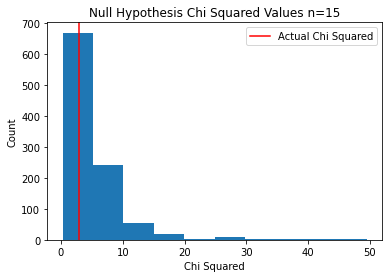

Max Value Under Null Hypothesis: 49.54091364676574
Actual Chi Squared: 2.926187239198447 
p-value: 0.625


In [59]:
# chi squared test
n = 15
sample = thinkstats2.SampleRows(live, n)
firsts = sample[sample.birthord == 1]
others = sample[sample.birthord != 1]

chi_sq = ChiSquared(live, firsts)

# generate null hypothesis data
iters = 1000
chis = []
for _ in range(iters):
    samp = thinkstats2.SampleRows(live, n)
    chis.append(ChiSquared(live, samp))
p_val = len(np.array(chis)[np.where(chis >= chi_sq)]) / len(chis)

plt.hist(chis)
plt.axvline(chi_sq, label='Actual Chi Squared', color='r')
plt.title('Null Hypothesis Chi Squared Values n={}'.format(n))
plt.ylabel('Count')
plt.xlabel('Chi Squared')
plt.legend()
plt.show()
print('Max Value Under Null Hypothesis: {}'.format(max(chis)))
print('Actual Chi Squared: {} '.format(chi_sq))
print('p-value: {}'.format(p_val))

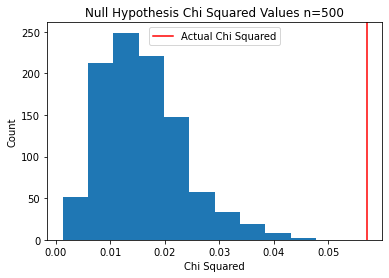

Max Value Under Null Hypothesis: 0.047704955976303726
Actual Chi Squared: 0.057041969873135936 
p-value: 0.0


In [60]:
n = 500
sample = thinkstats2.SampleRows(live, n)
firsts = sample[sample.birthord == 1]
others = sample[sample.birthord != 1]

chi_sq = ChiSquared(live, firsts)

# generate null hypothesis data
iters = 1000
chis = []
for _ in range(iters):
    samp = thinkstats2.SampleRows(live, n)
    chis.append(ChiSquared(live, samp))
p_val = len(np.array(chis)[np.where(chis >= chi_sq)]) / len(chis)

plt.hist(chis)
plt.axvline(chi_sq, label='Actual Chi Squared', color='r')
plt.title('Null Hypothesis Chi Squared Values n={}'.format(n))
plt.ylabel('Count')
plt.xlabel('Chi Squared')
plt.legend()
plt.show()
print('Max Value Under Null Hypothesis: {}'.format(max(chis)))
print('Actual Chi Squared: {} '.format(chi_sq))
print('p-value: {}'.format(p_val))

We can see that the p-value for the chi squared test is generally lower for a larger sample. As it gets lower, the p-value gets more erratic, so its hard to say what the lowest value that yields a positive test is. It sometimes happens randomly for low sample sizes.

# 10.1
Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height?

Like the NSFG, the BRFSS oversamples some groups and provides a sampling weight for each respondent. In the BRFSS data, the variable name for these weights is totalwt. Use resampling, with and without weights, to estimate the mean height of respondents in the BRFSS, the standard error of the mean, and a 90% confidence interval. How much does correct weighting affect the estimates?

In [61]:
import scipy

In [62]:
# import data
import brfss

df = brfss.ReadBrfss(nrows=None)
df = df.dropna(subset=['htm3', 'wtkg2'])
heights, weights = df.htm3, df.wtkg2
log_weights = np.log10(weights)

In [72]:
# linear regression
regress = scipy.stats.linregress(heights, log_weights)
slope, intercept, rvalue, pvalue, stderr = regress

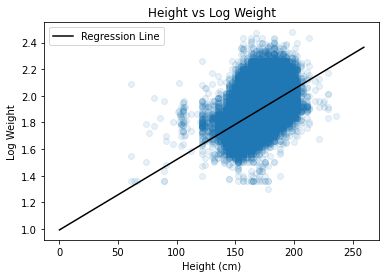

Pearson r: 0.5317282605983428
p-value: 0.0
Coeffiicient of Determination: 0.2827349431189391


In [150]:
# plot regression
plt.scatter(heights, log_weights, alpha=0.1)

x_fit = np.linspace(0, max(heights)*1.1, 100)
y_fit = slope*x_fit + intercept
plt.plot(x_fit, y_fit, color='k', label='Regression Line')
plt.title('Height vs Log Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Log Weight')
plt.legend()
plt.show()
print('Pearson r: {}'.format(rvalue))
print('p-value: {}'.format(pvalue))

# get coef of determination
ss_y = np.sum((log_weights - np.mean(log_weights))**2)
ss_y

ss_res = np.sum(residuals**2)
ss_res

coef_determination = 1 - ss_res / ss_y
print('Coeffiicient of Determination: {}'.format(coef_determination))

Here we get a correlation coeficient of 0.53, with a R^2 of 0.28. The p-value is practically zero.
We can plot this same line against weight instead of log weight:

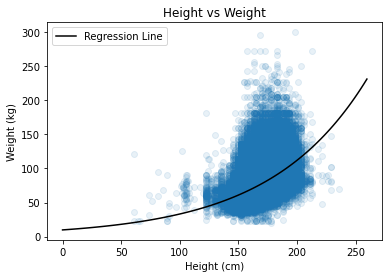

In [135]:
# plot regression
plt.scatter(heights, weights, alpha=0.1)

x_fit = np.linspace(0, max(heights)*1.1, 100)
y_fit = slope*x_fit + intercept
plt.plot(x_fit, 10**y_fit, color='k', label='Regression Line')
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

This is the exponential relationship between height and weight predicted by the linear regression line. Now look at residuals:

In [82]:
# get residuals
residuals = []
for h, w in zip(heights, log_weights):
    r = w - (h*slope + intercept)
    residuals.append(r)

In [119]:
# Use mostly 'normal' heights
height_range = range(140, 190)

In [124]:
# plot percentiles
r_25 = []
r_50 = []
r_75 = []
residuals = np.array(residuals)
for h in height_range:
    r = residuals[np.where(heights == h)]
    if r.size != 0:
        r_25.append(np.percentile(residuals[np.where(heights == h)], 25))
        r_50.append(np.percentile(residuals[np.where(heights == h)], 50))
        r_75.append(np.percentile(residuals[np.where(heights == h)], 75))

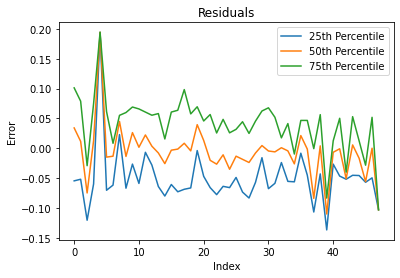

In [127]:
plt.plot(r_25, label='25th Percentile')
plt.plot(r_50, label='50th Percentile')
plt.plot(r_75, label='75th Percentile')
plt.title('Residuals')
plt.xlabel('Index')
plt.ylabel('Error')
plt.legend()
plt.show()

This is a little noisy, binning the heights could help here. Regardless, the residuals looks fairly constant for average heights and don't seem to lean too far in either direction. This suggests some amount of linearity between height and the log of weight. Presenting the data, I would emphasize that this implies there is an exponential relationship between height and weight.

Let's look and see if knowing height reduces error:

In [152]:
# get coef of determination
std_y = np.std(log_weights)
std_y

std_res = np.std(residuals)
std_res

1 - std_res / std_y

0.15308497658751308

Using the height as a predictor reduces the standard deviation of the error by 15%.

We will do weighted resampling next, and look at the effect on height.

In [133]:
# weighted resampling:
def Summarize(estimates):
    mean = np.mean(estimates)
    stderr = np.std(estimates)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

In [46]:
# resample rows
estimates_unweighted = [thinkstats2.ResampleRows(df).htm3.mean() for _ in range(100)]
Summarize(estimates_unweighted)

mean, SE, CI 168.95647787445176 0.01560168147476376 (168.92684522726813, 168.9807595141373)


In [47]:
# weighted
def ResampleRowsWeighted(df, column='finalwgt'):
    weights = df[column]
    cdf = thinkstats2.Cdf(dict(weights))
    indices = cdf.Sample(len(weights))
    sample = df.loc[indices]
    return sample

In [48]:
estimates_weighted = [ResampleRowsWeighted(df, 'finalwt').htm3.mean() for _ in range(100)]
Summarize(estimates_weighted)

mean, SE, CI 170.4937827664262 0.018048179725448525 (170.46466430202713, 170.52029901574406)


There is nearly a 2cm difference in height using weighted vs unweighted sample. This difference falls outside of the 90% confidence interval for each estimate.